In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Coffee Production Dataset

In [3]:
# https://www.kaggle.com/code/firefortysix/geospatial-viz-of-global-coffee-production-in-2020/data
coffee_production = pd.read_csv('data/coffee-production-by-exporting-countries-1991-2020-ico.csv', 
                                encoding = "ISO-8859-1",
                                skip_blank_lines=True)
coffee_production.drop(columns='Type',inplace=True)
coffee_production.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,1637137.716,1637609.604,2076201.252,1690018.716,1691522.82,1083612.132,1751804.58,1568880.24,2205651.198,...,3325704.612,2915509.734,3325080.072,3281337.984,3198286.014,3172235.256,3407290.704,3164389.074,3907847.982,3492642.762
1,Viet Nam,78617.280,86270.880,140426.820,181212.960,217896.54,238205.160,345148.86,418736.52,423103.320,...,1199999.994,1589976.666,1404126.342,1656586.884,1634431.314,1865402.514,1669150.572,2005949.940,1816984.488,1829229.864
2,Colombia,863760.000,1078823.820,896812.680,685345.320,777840.00,776281.080,646731.00,727349.76,652077.720,...,511359.564,459200.016,595616.670,727444.212,800000.610,840526.884,878063.358,829444.350,831957.720,846007.092
3,Indonesia,446482.980,509591.760,334168.680,404597.280,322072.68,274405.740,493235.04,457246.68,437757.300,...,547710.708,413335.398,784202.316,774056.958,656776.638,755128.506,692461.596,651138.918,577055.652,685976.550
4,Ethiopia,174567.060,175479.840,109510.260,178020.240,165763.80,189919.320,204446.52,183411.84,175663.500,...,333623.088,339024.594,367920.396,374546.634,382995.708,390898.524,428578.776,440803.992,450673.404,440605.974


In [4]:
# transposing dataframe and resetting index
coffee_production = coffee_production.set_index('Country').T
coffee_production.reset_index(inplace=True)

# adjusting index name, eliminating axis name, snakecasing columns
coffee_production.rename(columns={'index':'Year'},inplace=True)
coffee_production.rename_axis(None,axis=1,inplace=True)
coffee_production.columns = [col.lower().replace(' ','_') 
                            for col in coffee_production.columns]

# casting year from object to integer and fixing vietnam name
coffee_production.year = coffee_production.year.astype(int)
coffee_production.rename(columns={'viet_nam':'vietnam'},inplace=True)

In [5]:
col_coffee_production = coffee_production[['year','colombia']]

### Retail Prices Dataset

In [6]:
# https://www.ico.org/new_historical.asp?section=Statistics
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [7]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa'},inplace=True)

In [8]:
# Will avoid imputing missing data until necessary
retail_prices.head()

,year,austria,belgium,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,slovakia,slovenia,spain,sweden,japan,norway,russian_federation,switzerland,united_kingdom_1,usa
0,1990,4.90,3.27,NaN,2.83,NaN,3.81,2.98,3.73,3.99,...,NaN,NaN,3.62,3.43,10.26,3.31,NaN,4.83,10.55,2.97
1,1991,4.57,2.92,NaN,2.80,NaN,3.67,2.72,3.43,3.84,...,NaN,NaN,3.50,3.29,11.88,3.16,NaN,4.36,10.41,2.81
2,1992,4.99,3.05,NaN,2.87,NaN,3.79,2.46,2.31,4.00,...,NaN,NaN,3.50,3.11,12.62,3.12,NaN,4.52,10.09,2.58
3,1993,4.97,2.78,NaN,2.60,NaN,3.48,1.94,2.03,3.62,...,NaN,NaN,2.79,2.65,14.57,2.46,NaN,4.27,8.44,2.47
4,1994,4.58,3.42,NaN,3.18,NaN,4.45,2.73,2.40,4.18,...,NaN,NaN,2.76,3.79,14.69,3.29,NaN,4.50,11.36,3.40


### USA Retail Price

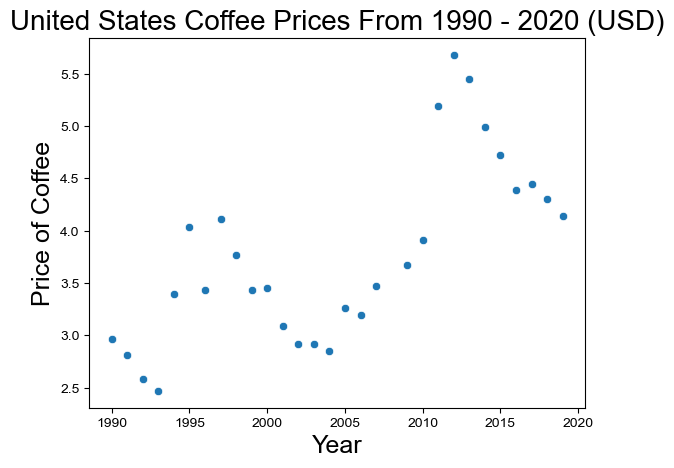

In [9]:
ax = sns.scatterplot(x=retail_prices.year,y=retail_prices.usa)

sns.set(rc={'figure.figsize':(10,6)})

ax.set_title('United States Coffee Prices From 1990 - 2020 (USD)',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Price of Coffee',fontsize=18);

## Colombia Temperature Changes

In [10]:
# https://www.kaggle.com/datasets/sevgisarac/temperature-change
global_warming_df = pd.read_csv('data/FAOSTAT_data_1-10-2022.csv')
global_warming_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


### Global Warming Dataset

In [11]:
# Assigning Colombia as its own DataFrame
colombia_temp_change = global_warming_df[global_warming_df.Area=='Colombia']

In [12]:
# cleaning columns
colombia_temp_change.columns = [col.lower().strip().replace(' ','_') 
 for col in colombia_temp_change.columns]

In [13]:
# grabbing only meterological year as months for easy plotting/visualization
colombia_yearly_temp_change = colombia_temp_change[colombia_temp_change['months']=='Meteorological year'].sort_values(by=['months','year'],ascending=False)

In [14]:
colombia_yearly_temp_change.head()

,domain_code,domain,area_code_(fao),area,element_code,element,months_code,months,year_code,year,unit,value,flag,flag_description
48891,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2020,2020,?C,1.391,Fc,Calculated data
48890,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2019,2019,?C,1.228,Fc,Calculated data
48889,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2018,2018,?C,0.972,Fc,Calculated data
48888,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2017,2017,?C,0.625,Fc,Calculated data
48887,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2016,2016,?C,0.941,Fc,Calculated data


In [15]:
colombia_yearly_temp_change = colombia_yearly_temp_change[['year','value']]

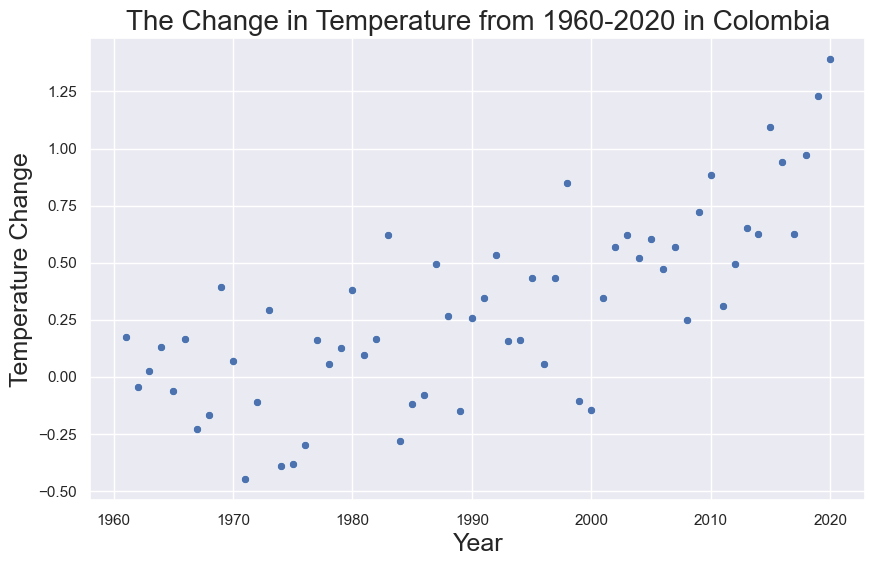

In [16]:
ax = sns.scatterplot(x=colombia_yearly_temp_change.year,
                     y=colombia_yearly_temp_change.value);

sns.set(rc={'figure.figsize':(10,6)})

ax.set_title('The Change in Temperature from 1960-2020 in Colombia',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Temperature Change',fontsize=18);

### Quick Interpretation:
- There is a clear increase in temperature that is especially prevelant since 2000

## Colombia Production

In [17]:
# reading in and cleaning production dataset
production = pd.read_csv('data/Colombia_data/colombia_production.csv')
production.columns=[col.lower().strip().replace(' ','_').replace('/','_') 
                    for col in production.columns]
production.crop_year = [each[:4] for each in production.crop_year]
production.rename(columns={'crop_year':'year'},inplace=True)

In [18]:
col_production = production
col_production.year = col_production.year.astype(int)

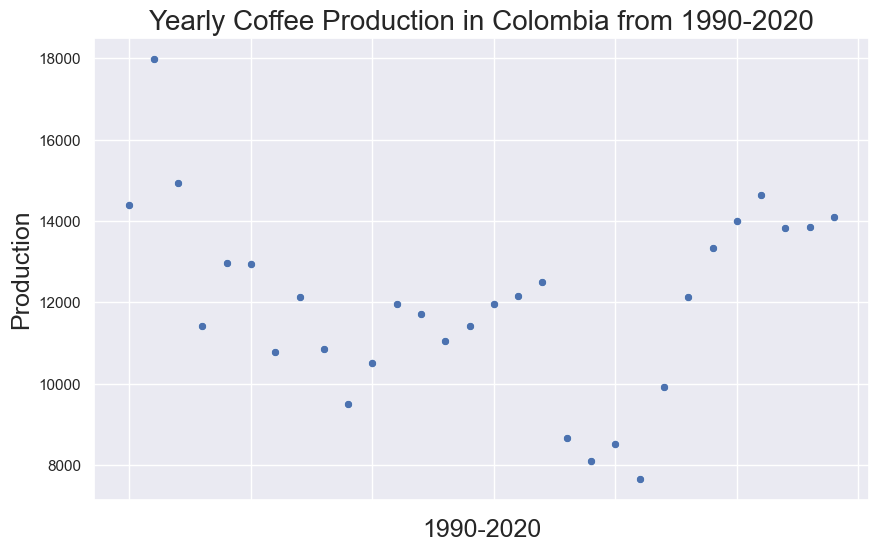

In [19]:
ax = sns.scatterplot(x=production.year,
                     y=production.colombia);

sns.set(rc={'figure.figsize':(10,6)});

ax.set_xticklabels([]);

ax.set_title('Yearly Coffee Production in Colombia from 1990-2020',fontsize=20)
ax.set_xlabel('1990-2020',fontsize=18)
ax.set_ylabel('Production',fontsize=18);

## Global Temperature Change
https://www.climate.gov/maps-data/dataset/global-temperature-anomalies-graphing-tool

In [20]:
global_temp_change = pd.read_csv('data/global_temp_change.csv')
global_temp_change.head()

,year,global_change_in_celsius
0,1980,0.32
1,1981,0.53
2,1982,0.12
3,1983,0.51
4,1984,0.07


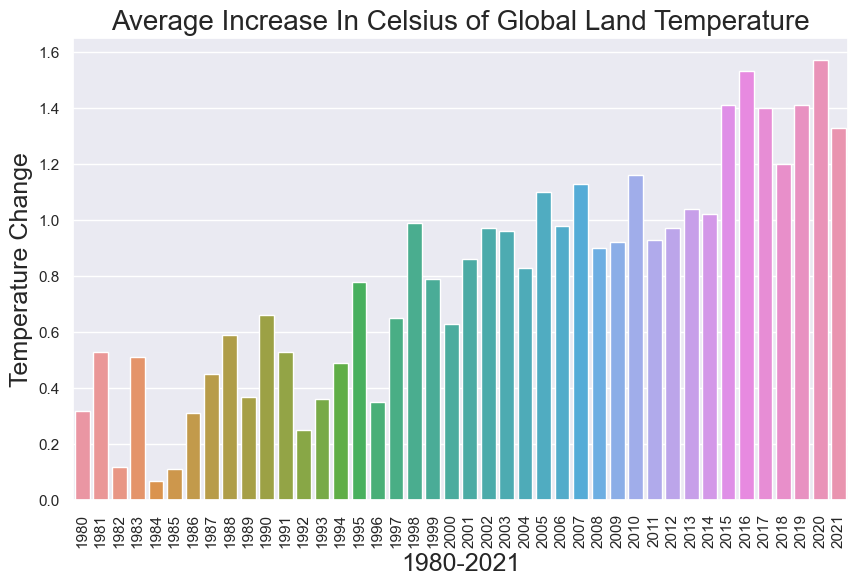

In [21]:
ax = sns.barplot(x=global_temp_change.year,
                 y=global_temp_change.global_change_in_celsius);

sns.set(rc={'figure.figsize':(10,6)});

ax.set_title('Average Increase In Celsius of Global Land Temperature',fontsize=20)
ax.set_xlabel('1980-2021',fontsize=18)
ax.set_ylabel('Temperature Change',fontsize=18);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

## Merged Data

**Dataframes used in this notebook**
- col_coffee_production
- retail_prices - Lara has
- colombia_yearly_temp_change
- col_production
- global_temp_change

In [22]:
col_coffee_production.head()

,year,colombia
0,1991,863760.00
1,1992,1078823.82
2,1993,896812.68
3,1994,685345.32
4,1995,777840.00


In [23]:
colombia_yearly_temp_change.head()

,year,value
48891,2020,1.391
48890,2019,1.228
48889,2018,0.972
48888,2017,0.625
48887,2016,0.941


In [24]:
col_production.head()

,year,colombia
0,1990,14396.000
1,1991,17980.397
2,1992,14946.878
3,1993,11422.422
4,1994,12964.000


In [25]:
global_temp_change.head()

,year,global_change_in_celsius
0,1980,0.32
1,1981,0.53
2,1982,0.12
3,1983,0.51
4,1984,0.07


In [26]:
merge_1 = pd.merge(col_production,global_temp_change,on='year',how='right')

In [27]:
merge_2 = pd.merge(col_coffee_production,colombia_yearly_temp_change,on='year',how='right')

In [28]:
col_capparelli_df = pd.merge(merge_1,merge_2,on='year')

In [29]:
colombia_df = col_capparelli_df.iloc[10:41]

In [30]:
colombia_df.rename(columns={'colombia_x':'col_prod_60kg_bags','colombia_y':'col_annual_crop_yield',
                            'value':'col_annual_celsius_change'},inplace=True)

/var/folders/pj/j8qg9t055bx9yt_m61ngrhyh0000gn/T/ipykernel_89810/239219788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombia_df.rename(columns={'colombia_x':'col_prod_60kg_bags','colombia_y':'col_annual_crop_yield',


In [31]:
colombia_df = colombia_df[['year','col_annual_crop_yield',
                           'col_prod_60kg_bags','col_annual_celsius_change',
                           'global_change_in_celsius']]

In [32]:
colombia_df.to_csv('data/colombia_capp.csv',index=False)

In [33]:
colombia_df.head()

,year,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius
10,1990,NaN,14396.000,0.258,0.66
11,1991,863760.00,17980.397,0.347,0.53
12,1992,1078823.82,14946.878,0.532,0.25
13,1993,896812.68,11422.422,0.157,0.36
14,1994,685345.32,12964.000,0.162,0.49


## Final DataFrame

In [34]:
df = pd.read_csv('data/full_df.csv')

In [35]:
df.columns = [col.lower().replace(' ','_').replace('(','').replace(')','') for col in df.columns]

In [36]:
#sns.pairplot(df);

In [37]:
df.corr()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,thousand_units_bags_of_60_kg,b_thousand_usd_grn_coffee_prod,b_annual_avg_temp,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption
year,1.000000,-0.612423,0.964730,0.928054,0.700988,0.941101,0.928772,0.821179,-0.123770,-0.123770,0.697278,0.881374,0.962214,0.808343,0.933709,0.995082
b_hectares_harvested,-0.612423,1.000000,-0.563452,-0.377913,-0.620083,-0.503481,-0.335362,-0.512882,-0.015257,0.167285,-0.417129,-0.486058,-0.511797,-0.370582,-0.596514,-0.545957
b_hectograms_per_hectare_yield,0.964730,-0.563452,1.000000,0.970640,0.669121,0.931136,0.952718,0.766753,-0.070743,-0.093319,0.706737,0.831731,0.926718,0.723276,0.923923,0.958395
b_tonnes_produced,0.928054,-0.377913,0.970640,1.000000,0.588567,0.868011,0.987176,0.719414,-0.160186,-0.147426,0.657141,0.804736,0.893233,0.702495,0.876412,0.931135
usa_retail_price,0.700988,-0.620083,0.669121,0.588567,1.000000,0.592242,0.600006,0.547078,-0.380005,-0.169835,0.359268,0.539014,0.622417,0.511986,0.654165,0.699292
thousand_units_bags_of_60_kg,0.941101,-0.503481,0.931136,0.868011,0.592242,1.000000,0.870817,0.765272,0.069799,0.112057,0.687911,0.826565,0.929708,0.710241,0.869034,0.926795
b_thousand_usd_grn_coffee_prod,0.928772,-0.335362,0.952718,0.987176,0.600006,0.870817,1.000000,0.744697,-0.251479,-0.158187,0.583705,0.798314,0.899459,0.734789,0.889618,0.941605
b_annual_avg_temp,0.821179,-0.512882,0.766753,0.719414,0.547078,0.765272,0.744697,1.000000,-0.108260,0.048004,0.834886,0.941519,0.782794,0.832829,0.788673,0.802881
col_annual_crop_yield,-0.123770,-0.015257,-0.070743,-0.160186,-0.380005,0.069799,-0.251479,-0.108260,1.000000,0.725162,0.216807,-0.054003,-0.174842,0.038779,-0.202310,-0.223440
col_prod_60kg_bags,-0.123770,0.167285,-0.093319,-0.147426,-0.169835,0.112057,-0.158187,0.048004,0.725162,1.000000,0.254939,0.025621,-0.069782,0.238017,-0.150013,-0.160113


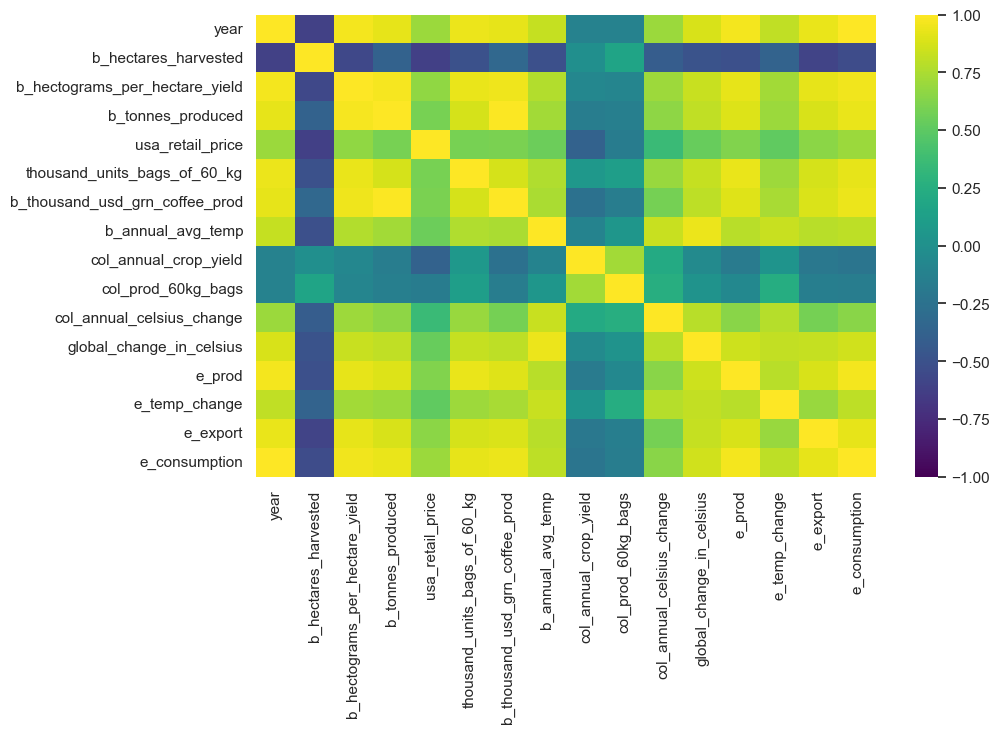

In [38]:
sns.heatmap(df.corr(),cmap='viridis',vmax=1,vmin=-1);

## Preparing Data For Modeling

### Null Values

In [39]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_temp_change                     3
usa_retail_price                  2
thousand_units_bags_of_60_kg      1
b_thousand_usd_grn_coffee_prod    1
b_annual_avg_temp                 1
col_annual_crop_yield             1
col_prod_60kg_bags                1
e_prod                            1
e_export                          1
e_consumption                     1
dtype: int64

In [40]:
# only 2 values missing, 2008,2020
# the mean works for 2008 because 2007 is the actual mean
# the mean works for 2020 because coffee prices are falling back down towards the mean
# additionally, the mean filling this single value will not throw off any modeling
df.usa_retail_price.fillna(df.usa_retail_price.mean(),inplace=True)

In [41]:
df.isnull().sum().sort_values(ascending=False).head(10)

e_temp_change                     3
thousand_units_bags_of_60_kg      1
b_thousand_usd_grn_coffee_prod    1
b_annual_avg_temp                 1
col_annual_crop_yield             1
col_prod_60kg_bags                1
e_prod                            1
e_export                          1
e_consumption                     1
year                              0
dtype: int64

In [42]:
# using the min for temp_change as 1990-1993 are the missing values
# the first of 1994 value is the min
df.e_temp_change.fillna(df.e_temp_change.min(),inplace=True)

In [43]:
# missing value here is for year 2020
# missing value can be imputed using 3rd quantile
# steady rise in value, 3rd quantile is most appropriate over mean or median
df.thousand_units_bags_of_60_kg.fillna(df.thousand_units_bags_of_60_kg.quantile(.75),
                                       inplace=True)

In [44]:
df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,thousand_units_bags_of_60_kg,b_thousand_usd_grn_coffee_prod,b_annual_avg_temp,col_annual_crop_yield,col_prod_60kg_bags,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption
0,1990,2908960,5036,1464856,2.97,18297.617,1.573783e+06,25.12,NaN,14396.000,0.258,0.66,2909.451,0.244,1074.101,1200.0
1,1991,2763440,5502,1520382,2.81,18661.180,1.633438e+06,25.05,863760.00,17980.397,0.347,0.53,2924.664,0.244,841.329,1264.0
2,1992,2500320,5177,1294373,2.58,18290.453,1.390623e+06,24.91,1078823.82,14946.878,0.532,0.25,1825.171,0.244,734.461,1331.0
3,1993,2259330,5660,1278759,2.47,19217.137,1.373848e+06,25.02,896812.68,11422.422,0.157,0.36,2967.004,0.244,1166.778,1402.0
4,1994,2097650,6232,1307289,3.40,17326.104,1.404499e+06,25.14,685345.32,12964.000,0.162,0.49,2762.730,0.599,1475.325,1476.0


In [45]:
df.isnull().sum().sort_values(ascending=False).head(10)

b_thousand_usd_grn_coffee_prod    1
b_annual_avg_temp                 1
col_annual_crop_yield             1
col_prod_60kg_bags                1
e_prod                            1
e_export                          1
e_consumption                     1
year                              0
b_hectares_harvested              0
b_hectograms_per_hectare_yield    0
dtype: int64

In [46]:
# again filling with 75th percentile due to steady increase in production
df.b_thousand_usd_grn_coffee_prod.fillna(df.b_thousand_usd_grn_coffee_prod.quantile(.75),
                                       inplace=True)

In [47]:
df.isnull().sum().sort_values(ascending=False).head(10)

b_annual_avg_temp                 1
col_annual_crop_yield             1
col_prod_60kg_bags                1
e_prod                            1
e_export                          1
e_consumption                     1
year                              0
b_hectares_harvested              0
b_hectograms_per_hectare_yield    0
b_tonnes_produced                 0
dtype: int64

In [48]:
# consistent values makes the mean most appropriate here
df.b_annual_avg_temp.fillna(df.b_annual_avg_temp.mean(),
                            inplace=True)

In [49]:
df.isnull().sum().sort_values(ascending=False).head()

col_annual_crop_yield    1
col_prod_60kg_bags       1
e_prod                   1
e_export                 1
e_consumption            1
dtype: int64

In [50]:
# again earlier years show lower values, using the 25th percentile to fill the single missing value
# is most appropriate
df.col_annual_crop_yield.fillna(df.col_annual_crop_yield.quantile(.25),
                                inplace=True)

In [51]:
df.isnull().sum().sort_values(ascending=False).head()

col_prod_60kg_bags    1
e_prod                1
e_export              1
e_consumption         1
year                  0
dtype: int64

In [52]:
# 75th percentile most appropriate to fill missing value due to steady increase in production
# especially towards most recent years
df.col_prod_60kg_bags.fillna(df.col_prod_60kg_bags.quantile(.75),
                             inplace=True)

In [53]:
df.isnull().sum().sort_values(ascending=False).head()

e_prod                  1
e_export                1
e_consumption           1
year                    0
b_hectares_harvested    0
dtype: int64

In [54]:
# 2020 again missing value, 75th percentile remains most appropriate
df.e_prod.fillna(df.e_prod.quantile(.75),inplace=True)

In [55]:
df.isnull().sum().sort_values(ascending=False).head()

e_export                          1
e_consumption                     1
year                              0
b_hectares_harvested              0
b_hectograms_per_hectare_yield    0
dtype: int64

In [56]:
# 2020 is the missing value, 75th percentile for same reasons as before
df.e_export.fillna(df.e_export.quantile(.75),inplace=True)

In [57]:
df.isnull().sum().sort_values(ascending=False).head()

e_consumption                     1
year                              0
b_hectares_harvested              0
b_hectograms_per_hectare_yield    0
b_tonnes_produced                 0
dtype: int64

In [58]:
# 2020 is the missing value, 75th percentile for same reasons as before
df.e_consumption.fillna(df.e_consumption.quantile(.75),inplace=True)

In [59]:
df.drop(columns=(['b_thousand_usd_grn_coffee_prod','col_annual_crop_yield']),inplace=True)

## Converting Columns and Dropping Unecessary columns

In [60]:
# converting kg to pounds
# creating column to represent change
df['us_consumption_lbs'] = [(each*1000)*2.2 for each in df.thousand_units_bags_of_60_kg]
df.col_prod_60kg_bags = [(each*1000)*2.2 for each in df.col_prod_60kg_bags]

# renaming columning to representing change
df.rename(columns={'col_prod_60kg_bags':'col_production_lbs'},inplace=True)

# dropping unchanged column
df.drop(columns='thousand_units_bags_of_60_kg',inplace=True)

In [61]:
df.to_csv('data/cleaned_merged_df.csv',index=False)

## Adding Column I forgot to add originally

In [62]:
col_annual_avg_temp = pd.read_csv('data/Colombia_data/tas_timeseries_annual_cru_1901-2021_COL.csv')

In [63]:
df = pd.merge(df,col_annual_avg_temp,on='year')

In [64]:
df.head()

,year,b_hectares_harvested,b_hectograms_per_hectare_yield,b_tonnes_produced,usa_retail_price,b_annual_avg_temp,col_production_lbs,col_annual_celsius_change,global_change_in_celsius,e_prod,e_temp_change,e_export,e_consumption,us_consumption_lbs,col_avg_temp_celsius
0,1990,2908960,5036,1464856,2.97,25.12,31671200.0,0.258,0.66,2909.451,0.244,1074.101,1200.0,40254757.4,24.77
1,1991,2763440,5502,1520382,2.81,25.05,39556873.4,0.347,0.53,2924.664,0.244,841.329,1264.0,41054596.0,24.82
2,1992,2500320,5177,1294373,2.58,24.91,32883131.6,0.532,0.25,1825.171,0.244,734.461,1331.0,40238996.6,24.95
3,1993,2259330,5660,1278759,2.47,25.02,25129328.4,0.157,0.36,2967.004,0.244,1166.778,1402.0,42277701.4,24.80
4,1994,2097650,6232,1307289,3.40,25.14,28520800.0,0.162,0.49,2762.730,0.599,1475.325,1476.0,38117428.8,24.77


In [65]:
df.to_csv('data/cleaned_merged_df.csv',index=False)

In [ ]:
reports need to be before Dec 21st
under .5%
you need a dildo

In [ ]:
df.loc[(reports < Dec 21) & (sales under 5%)]

In [ ]:
SELECT *
FROM T